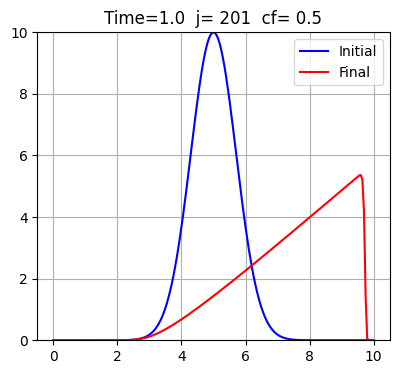

In [3]:
import numpy as np

#define the speed a
a = 10.0

# Define the domain
L = 10.0     # Domain length
j = 201    # Number of grid points/ The resolution
dx = L/(j-1)   # Grid spacing
x = np.linspace(0, L, j)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
x0 = 5
dt = cf*dx/a   # Time step
t_final = 1.0

# print('nx=',j)
# print('dx=',dx)
# print('dt=',dt)
# print('Number of iterations=',t_final/dt)

# Initialize the solution array
u_initial = 10*np.exp(-(x-x0)**2) 
u_current = u_initial.copy()
#we create arrays where we will store the time and the L2 norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)
#########################################################################################

import matplotlib.pyplot as plt
import os
##create directory where to save images
# print(os.getcwd())

os.makedirs('./images_Hw_1-3_Burgers_conservative') # makedirs create a new directory in the operating system.

# os.listdir('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection')

#######################################################################################################################

# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, color= 'blue')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,10)
plt.savefig('./images_Hw_1-3_Burgers_conservative/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# Solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to using periodic boundary conditions
    u_next =  u_current - (dt/(dx))*(u_current**2 - np.roll(u_current, 1)**2)/2

    # Update the solution
    u_current  = u_next.copy()

    #advance the time
    t += dt
    i += 1

    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, color ='blue')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,10)
        plt.savefig('./images_Hw_1-3_Burgers_conservative/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
plt.figure(figsize=(10,4))
# Plot the final solution
plt.subplot(1,2,1)
plt.plot(x, u_initial, label='Initial', color= 'blue')
plt.plot(x, u_current, label='Final', color = 'red')
plt.title('Time='+str(round(t,2))+'  j= {}'.format(j) + '  cf= {}'.format(cf))
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.show()    


# comments:

1- The function collapses if a is less than 4. "a = u(at some point)". We usually take the maximum of the function as it would guarantee no collapse because we need to contain most of the values of the function or "u".

2- Increasing the resolution will increase the sharpness of the shock and the L2norm function will be smoother. But at some point, increasing j wouldn't change anything.

3- As you increase the resolution, remember to increase a too because it would collapse

4- Increasing the t_final( Make the code run for longer time), we will see dissipation in the shock more and more.

# As we increase the period, it will make the function dissipate which is compatable with the negative squared term in Burger's equation.
$u_n = u_c - dt*(u_p^2-u_p^2)/dx$
